<a href="https://colab.research.google.com/github/Knox1983/KnoxDataCamp/blob/main/Clean_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('balanced_urls.csv')
df2 = pd.read_csv('malicious_phish.csv')
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,url,label,result,type
0,https://www.google.com,benign,0.0,NaN
1,https://www.youtube.com,benign,0.0,NaN
2,https://www.facebook.com,benign,0.0,NaN
3,https://www.baidu.com,benign,0.0,NaN
4,https://www.wikipedia.org,benign,0.0,NaN


In [22]:
with open("openphish_urls_sample.txt", "r") as f:
  phishing_urls = f.readlines()

phish_df = pd.DataFrame(phishing_urls, columns=["url"])
phish_df["label"] = 1
phish_df["url"] = phish_df["url"].str.strip()
phish_df.head()

,url,label
0,https://bridge-trizorr.webflow.io/,1
1,https://channelhub.info/84da89036x31f64031n8ec...,1
2,http://communityadstreamline.vercel.app/3a36ef...,1
3,https://wamdsyxx.com/,1
4,http://illegalcontentflagadforce.vercel.app/ge...,1


In [23]:
df = pd.concat([df, phish_df], ignore_index=True)
df.shape

(1284199, 4)

In [24]:
df = df.dropna(subset=["url"])
df['url'] = df['url'].str.strip().str.lower()
df = df.drop_duplicates(subset=["url"])
df = df[df['url'].str.startswith(("http://", "https://"))]
df.head()

,url,label,result,type
0,https://www.google.com,benign,0.0,NaN
1,https://www.youtube.com,benign,0.0,NaN
2,https://www.facebook.com,benign,0.0,NaN
3,https://www.baidu.com,benign,0.0,NaN
4,https://www.wikipedia.org,benign,0.0,NaN


In [25]:
df['url_length'] = df['url'].apply(len)
df['num_digits'] = df['url'].str.count(r'\d')
df['num_special_chars'] = df['url'].str.count(r'[-_%@]')
df['has_ip'] = df['url'].str.contains(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}')
keywords = ['login', 'verify', 'secure']
df['keyword_flag'] = df['url'].apply(lambda x: int(any(k in x for k in keywords)))
df.head()

,url,label,result,type,url_length,num_digits,num_special_chars,has_ip,keyword_flag
0,https://www.google.com,benign,0.0,NaN,22,0,0,False,0
1,https://www.youtube.com,benign,0.0,NaN,23,0,0,False,0
2,https://www.facebook.com,benign,0.0,NaN,24,0,0,False,0
3,https://www.baidu.com,benign,0.0,NaN,21,0,0,False,0
4,https://www.wikipedia.org,benign,0.0,NaN,25,0,0,False,0


<ipython-input-26-56c1fcb0f458>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'benign': 0, 'malicious': 1}).astype(float)


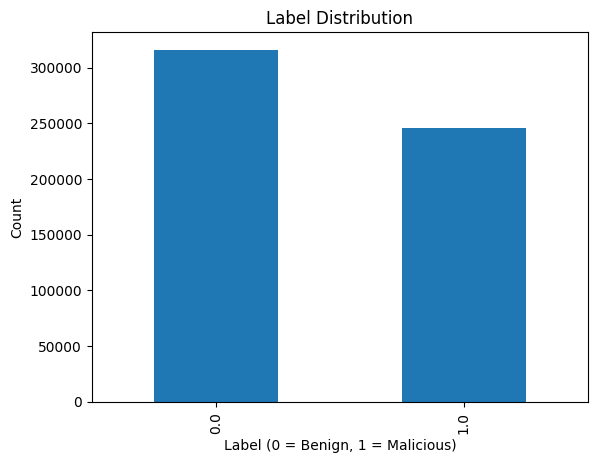

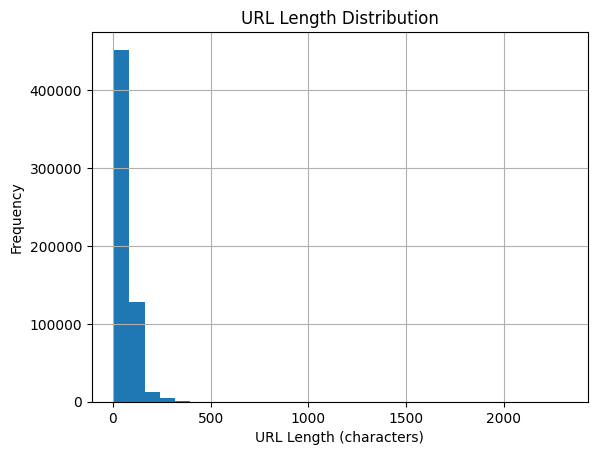

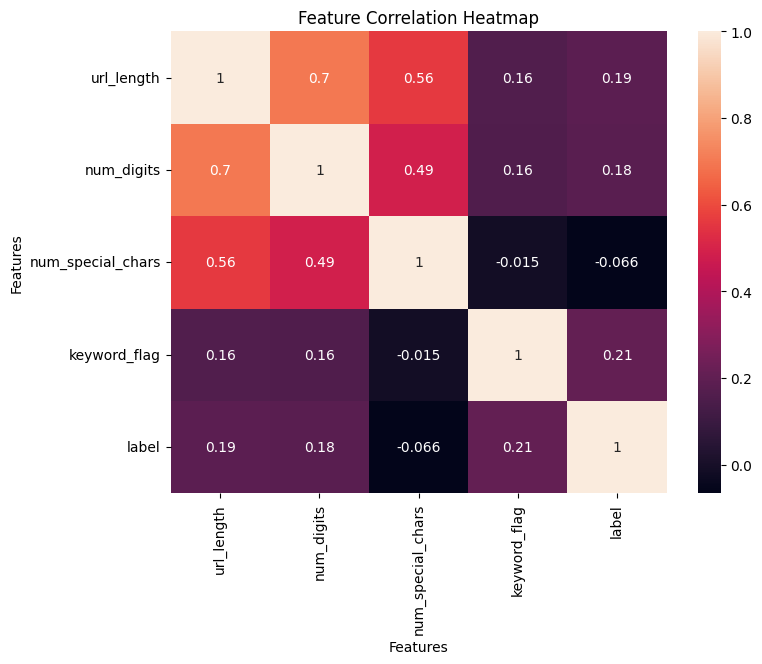

In [26]:
df['label'] = df['label'].replace({'benign': 0, 'malicious': 1}).astype(float)

df['label'].value_counts().plot(kind='bar', title='Label Distribution')
plt.xlabel("Label (0 = Benign, 1 = Malicious)")
plt.ylabel("Count")
plt.show()

df['url_length'].hist(bins=30)
plt.title("URL Length Distribution")
plt.xlabel("URL Length (characters)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[["url_length", "num_digits", "num_special_chars", "keyword_flag", "label"]].corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


In [27]:
df.to_csv("cleaned_urls.csv", index=False)